<a href="https://colab.research.google.com/github/carloscelestino1/DataAnalysis/blob/main/analiseDesastresAereos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Acidentes aéreos 2011 - 2021**

*A ideia desse estudo é analisar graficamente algumas informações provenientes de dados disponibilizados pelo gov.br e encontrado no link: https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
json1 = pd.read_json('/content/csvjson.json')


In [ ]:
json1.columns

Index(['codigo_ocorrencia2', 'aeronave_matricula',
       'aeronave_operador_categoria', 'aeronave_tipo_veiculo',
       'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao',
       'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd',
       'aeronave_pmd_categoria', 'aeronave_assentos',
       'aeronave_ano_fabricacao', 'aeronave_pais_fabricante',
       'aeronave_pais_registro', 'aeronave_registro_categoria',
       'aeronave_registro_segmento', 'aeronave_voo_origem',
       'aeronave_voo_destino', 'aeronave_fase_operacao',
       'aeronave_tipo_operacao', 'aeronave_nivel_dano',
       'aeronave_fatalidades_total'],
      dtype='object')

In [ ]:
tipo_operação = json1.aeronave_fase_operacao.value_counts()

# Representação gráfica de acidentes ocorridos em determinadas situações de voo. 

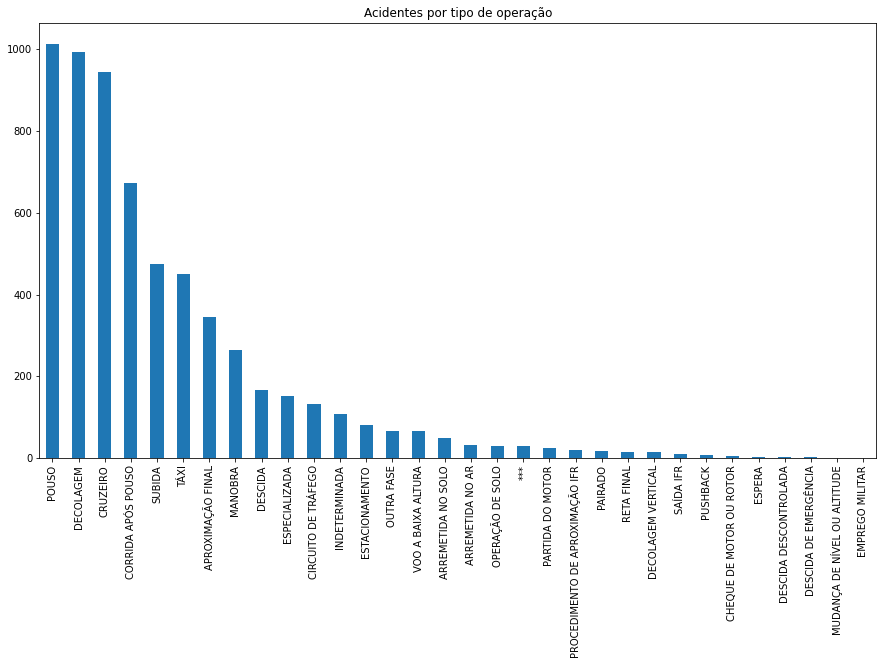

In [ ]:
plt.rcParams['figure.figsize'] = [15,8]
plt.title('Acidentes por tipo de operação')
tipo_operação.plot(kind = 'bar')

In [ ]:
acidente_operação = json1[['aeronave_fase_operacao','aeronave_fatalidades_total']]
acidente_operação = acidente_operação.value_counts()
acidente_operação = pd.DataFrame(acidente_operação)


In [ ]:
novo_df = acidente_operação.groupby(['aeronave_fase_operacao', 'aeronave_fatalidades_total']).sum().reset_index()
novo_df

,aeronave_fase_operacao,aeronave_fatalidades_total,0
0,***,0,21
1,***,1,6
2,***,2,2
3,APROXIMAÇÃO FINAL,0,321
4,APROXIMAÇÃO FINAL,1,12
...,...,...,...
101,VOO A BAIXA ALTURA,0,48
102,VOO A BAIXA ALTURA,1,10
103,VOO A BAIXA ALTURA,2,4
104,VOO A BAIXA ALTURA,3,2


In [ ]:
novo_df.drop(columns=0)

,aeronave_fase_operacao,aeronave_fatalidades_total
0,***,0
1,***,1
2,***,2
3,APROXIMAÇÃO FINAL,0
4,APROXIMAÇÃO FINAL,1
...,...,...
101,VOO A BAIXA ALTURA,0
102,VOO A BAIXA ALTURA,1
103,VOO A BAIXA ALTURA,2
104,VOO A BAIXA ALTURA,3


In [ ]:
acidente_operação = acidente_operação.groupby(['aeronave_fase_operacao']).sum().reset_index()
acidente_operação

,aeronave_fase_operacao,0
0,***,29
1,APROXIMAÇÃO FINAL,346
2,ARREMETIDA NO AR,31
3,ARREMETIDA NO SOLO,50
4,CHEQUE DE MOTOR OU ROTOR,6
5,CIRCUITO DE TRÁFEGO,133
6,CORRIDA APÓS POUSO,672
7,CRUZEIRO,943
8,DECOLAGEM,993
9,DECOLAGEM VERTICAL,14


In [ ]:
acidente_operação.rename(columns={0: 'total_obtos'}, inplace = True)
acidente_operação

,aeronave_fase_operacao,total_obtos
0,***,29
1,APROXIMAÇÃO FINAL,346
2,ARREMETIDA NO AR,31
3,ARREMETIDA NO SOLO,50
4,CHEQUE DE MOTOR OU ROTOR,6
5,CIRCUITO DE TRÁFEGO,133
6,CORRIDA APÓS POUSO,672
7,CRUZEIRO,943
8,DECOLAGEM,993
9,DECOLAGEM VERTICAL,14


# Representação gráfica de quantidades de mortes em determinadas situações de voo.

Text(0.5, 1.0, 'Relação de mortes por operação')

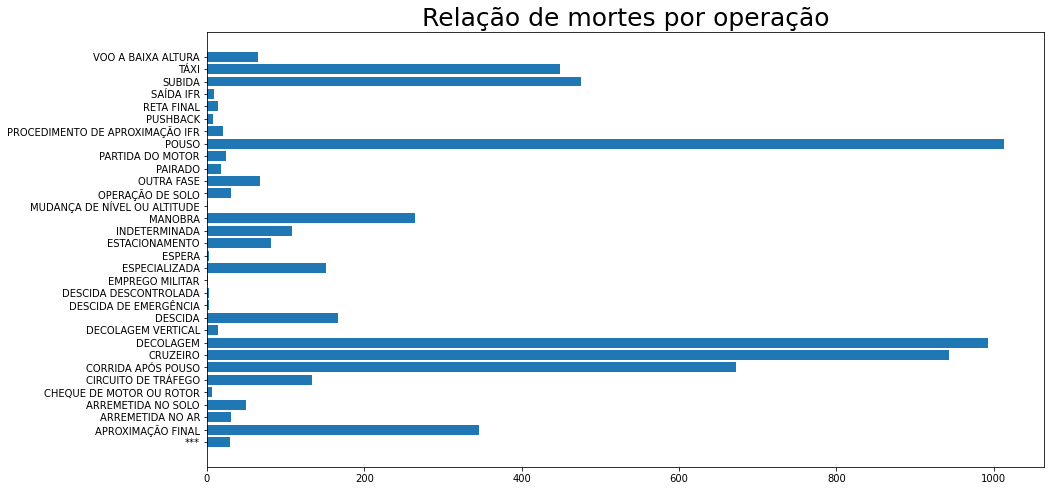

In [ ]:
plt.barh(acidente_operação.aeronave_fase_operacao, acidente_operação.total_obtos)
plt.rcParams['figure.figsize'] = [30,22]
plt.title('Relação de mortes por operação', fontsize=25)


In [ ]:
json1.columns

Index(['codigo_ocorrencia2', 'aeronave_matricula',
       'aeronave_operador_categoria', 'aeronave_tipo_veiculo',
       'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao',
       'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd',
       'aeronave_pmd_categoria', 'aeronave_assentos',
       'aeronave_ano_fabricacao', 'aeronave_pais_fabricante',
       'aeronave_pais_registro', 'aeronave_registro_categoria',
       'aeronave_registro_segmento', 'aeronave_voo_origem',
       'aeronave_voo_destino', 'aeronave_fase_operacao',
       'aeronave_tipo_operacao', 'aeronave_nivel_dano',
       'aeronave_fatalidades_total'],
      dtype='object')

In [ ]:
relacao = json1[['aeronave_voo_origem','aeronave_voo_destino']]
relacao.value_counts()

aeronave_voo_origem                    aeronave_voo_destino         
FORA DE AERODROMO                      FORA DE AERODROMO                2269
***                                    ***                               160
CAMPO DE MARTE                         CAMPO DE MARTE                     61
Comandante Rolim Adolfo Amaro          Comandante Rolim Adolfo Amaro      35
ESTADUAL ARTHUR SIQUEIRA               ESTADUAL ARTHUR SIQUEIRA           35
                                                                        ... 
FAZENDA AGROFEL                        MARECHAL RONDON                     1
FAZENDA ACARAJÁ                        ENTRE RIOS                          1
FAZ. SANTA MARIA DO PORTO DE CAPIVARA  MARECHAL RONDON                     1
FAZ. SANTA MARIA                       PIQUET                              1
ÓBIDOS                                 FLORES                              1
Length: 2362, dtype: int64

# Criação de um novo DATAFRAME. Foram selecionadas informações importantes para o desenvolvimento do estudo e recolocadas em outro DF.

In [ ]:
ml_inicio0 = json1[['aeronave_tipo_veiculo' , 'aeronave_motor_tipo' , 'aeronave_voo_origem' , 'aeronave_voo_destino' , 'aeronave_fase_operacao' , 'aeronave_nivel_dano' , 'aeronave_fatalidades_total']]
ml_inicio0

,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,AVIÃO,PISTÃO,DEPUTADO LUÍS EDUARDO MAGALHÃES,FAZENDA PONTAL,POUSO,SUBSTANCIAL,0
1,HELICÓPTERO,PISTÃO,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,SUBSTANCIAL,0
2,AVIÃO,PISTÃO,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,LEVE,0
3,AVIÃO,JATO,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,NENHUM,0
4,AVIÃO,JATO,FORA DE AERODROMO,FORA DE AERODROMO,CORRIDA APÓS POUSO,NENHUM,0
...,...,...,...,...,...,...,...
6186,AVIÃO,JATO,EURICO DE AGUIAR SALLES,CONGONHAS,ESTACIONAMENTO,LEVE,0
6187,AVIÃO,PISTÃO,FAZENDA SANTA RITA DO ARAGUAIA,TERUEL IPANEMA ESTÂNCIA,DECOLAGEM,LEVE,0
6188,AVIÃO,PISTÃO,ABA,MÁRIO RIBEIRO,CORRIDA APÓS POUSO,LEVE,0
6189,AVIÃO,JATO,SANTOS DUMONT,CONGONHAS,PROCEDIMENTO DE APROXIMAÇÃO IFR,NENHUM,0


In [ ]:
ml_inicio0.aeronave_tipo_veiculo.value_counts()


AVIÃO          4975
HELICÓPTERO     671
ULTRALEVE       336
***             166
PLANADOR         21
ANFÍBIO          13
TRIKE             5
DIRIGÍVEL         2
BALÃO             1
HIDROAVIÃO        1
Name: aeronave_tipo_veiculo, dtype: int64

# **A partir daqui, estarei alterando os tipos de dados por valores numéricos para que seja possível realizar a probabilidade de mortes em acidentes.**

In [ ]:
ml_inicio0["aeronave_tipo_veiculo"] = ml_inicio0["aeronave_tipo_veiculo"].map({
                                        'AVIÃO': 1,
                                        'HELICÓPTERO': 2,    
                                        'ULTRALEVE': 3,
                                        '***': 4,
                                        'PLANADOR': 5,
                                        'ANFÍBIO': 6,
                                        'TRIKE': 7,
                                        'DIRIGÍVEL': 8,
                                        'BALÃO': 9,
                                        'HIDROAVIÃO': 10
                                                        })

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
ml_inicio0.aeronave_fase_operacao.value_counts()

POUSO                              1013
DECOLAGEM                           993
CRUZEIRO                            943
CORRIDA APÓS POUSO                  672
SUBIDA                              475
TÁXI                                449
APROXIMAÇÃO FINAL                   346
MANOBRA                             264
DESCIDA                             166
ESPECIALIZADA                       151
CIRCUITO DE TRÁFEGO                 133
INDETERMINADA                       108
ESTACIONAMENTO                       82
OUTRA FASE                           67
VOO A BAIXA ALTURA                   65
ARREMETIDA NO SOLO                   50
ARREMETIDA NO AR                     31
OPERAÇÃO DE SOLO                     30
***                                  29
PARTIDA DO MOTOR                     24
PROCEDIMENTO DE APROXIMAÇÃO IFR      20
PAIRADO                              18
RETA FINAL                           14
DECOLAGEM VERTICAL                   14
SAÍDA IFR                             9


In [ ]:
lst = list(range(1,32+1))
ml_inicio0["aeronave_fase_operacao"] = ml_inicio0["aeronave_fase_operacao"].replace([
                                        'POUSO',
                                        'DECOLAGEM',
                                        'CRUZEIRO',
                                        'CORRIDA APÓS POUSO',
                                        'SUBIDA',
                                        'TÁXI',
                                        'APROXIMAÇÃO FINAL',
                                        'MANOBRA',
                                        'DESCIDA',
                                        'ESPECIALIZADA',
                                        'CIRCUITO DE TRÁFEGO',
                                        'INDETERMINADA',
                                        'ESTACIONAMENTO',
                                        'OUTRA FASE',
                                        'VOO A BAIXA ALTURA',
                                        'ARREMETIDA NO SOLO',
                                        'ARREMETIDA NO AR',
                                        'OPERAÇÃO DE SOLO',
                                        '***',
                                        'PARTIDA DO MOTOR',
                                        'PROCEDIMENTO DE APROXIMAÇÃO IFR',
                                        'PAIRADO',
                                        'RETA FINAL',
                                        'DECOLAGEM VERTICAL',
                                        'SAÍDA IFR',
                                        'PUSHBACK',
                                        'CHEQUE DE MOTOR OU ROTOR',
                                        'ESPERA',
                                        'DESCIDA DESCONTROLADA',
                                        'DESCIDA DE EMERGÊNCIA',
                                        'MUDANÇA DE NÍVEL OU ALTITUDE',
                                        'EMPREGO MILITAR'],
                                        
                                            lst
                                        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
ml_inicio0.aeronave_motor_tipo.value_counts()

PISTÃO        3362
JATO          1179
TURBOÉLICE     787
TURBOEIXO      561
***            267
SEM TRAÇÃO      21
                14
Name: aeronave_motor_tipo, dtype: int64

In [ ]:
lst = list(range(1,7+1))
ml_inicio0['aeronave_motor_tipo'] = ml_inicio0['aeronave_motor_tipo'].replace([
'PISTÃO','JATO','TURBOÉLICE','TURBOEIXO','***','SEM TRAÇÃO',''], lst)
ml_inicio0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,1,1,DEPUTADO LUÍS EDUARDO MAGALHÃES,FAZENDA PONTAL,1,SUBSTANCIAL,0
1,2,1,FORA DE AERODROMO,FORA DE AERODROMO,8,SUBSTANCIAL,0
2,1,1,FORA DE AERODROMO,FORA DE AERODROMO,10,LEVE,0
3,1,2,FORA DE AERODROMO,FORA DE AERODROMO,9,NENHUM,0
4,1,2,FORA DE AERODROMO,FORA DE AERODROMO,4,NENHUM,0
...,...,...,...,...,...,...,...
6186,1,2,EURICO DE AGUIAR SALLES,CONGONHAS,13,LEVE,0
6187,1,1,FAZENDA SANTA RITA DO ARAGUAIA,TERUEL IPANEMA ESTÂNCIA,2,LEVE,0
6188,1,1,ABA,MÁRIO RIBEIRO,4,LEVE,0
6189,1,2,SANTOS DUMONT,CONGONHAS,21,NENHUM,0


In [ ]:
lista_aeronave_voo_destino = ml_inicio0['aeronave_voo_destino'].tolist()
lista_aeronave_voo_destino


['FAZENDA PONTAL',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'GUARARAPES - GILBERTO FREYRE',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'SANTA GENOVEVA/GOIÂNIA',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'TARAUACÁ',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'SANTA GENOVEVA/GOIÂNIA',
 'EIRUNEPÉ',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'PAUINI',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'GOVERNADOR JOSÉ RICHA',
 'FAZENDA ARCO-ÍRIS',
 'SÍTIO POUSO DO AVIADOR',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'SOROCABA',
 'FORA DE AERODROMO',

In [ ]:
def remove_repetidos(lista):
    l = []
    for i in lista:
        if i not in l:
            l.append(i)
    return l


lista_aeronave_voo_destino = remove_repetidos(lista_aeronave_voo_destino)
print (lista_aeronave_voo_destino)

['FAZENDA PONTAL', 'FORA DE AERODROMO', 'GUARARAPES - GILBERTO FREYRE', 'SANTA GENOVEVA/GOIÂNIA', 'TARAUACÁ', 'EIRUNEPÉ', 'PAUINI', 'GOVERNADOR JOSÉ RICHA', 'FAZENDA ARCO-ÍRIS', 'SÍTIO POUSO DO AVIADOR', 'SOROCABA', 'ANTONIO CARLOS JOBIM / GALEÃO', 'PARATI', 'PRESIDENTE JUSCELINO KUBITSCHEK', 'ALTAMIRA', 'ARARAS', 'SANTO ANTÔNIO DE LEVERGER', 'DR. JOSÉ DE ARRUDA BOTELHO', 'PARÁ DE MINAS', 'CELTIC SEA', 'MAJOR BRIGADEIRO TROMPOWSKY', 'GENERAL LEITE DE CASTRO', 'ACERGY CONDOR', 'ESTÂNCIA SANTA RITA', 'FAZENDA SANTA MÔNICA', 'MAESTRO WILSON FONSECA', 'AERÓDROMO NACIONAL DE AVIAÇÃO', 'OSCAR LARANJEIRAS', 'ATLAS BRASIL CANTANHEDE', 'BLUMENAU', 'JOÃO MONTEIRO', 'BAURU', 'PILOTO OSVALDO MARQUES DIAS', 'CAMPO DE MARTE', 'FAZENDA THÁLIA', 'FAZENDA NOVA FLORESTA', 'CARINHANHA', 'OCOREMA', 'TEFÉ', 'CORIBE', 'ORIÇANGA DE ABREU', 'PREFEITO DOUTOR JOÃO SILVA FILHO', 'TIETÊ', 'DEPUTADO LUÍS EDUARDO MAGALHÃES', 'CONDOMÍNIO JACUMÃ OCEAN RESORT', 'TANCREDO NEVES', 'CASA BRANCA', 'ESTADUAL ARTHUR SIQUEIR

In [ ]:
len(lista_aeronave_voo_destino)

727

In [ ]:
lst = list(range(1,727+1))

In [ ]:
ml_inicio0['aeronave_voo_destino'] = ml_inicio0['aeronave_voo_destino'].replace(
      lista_aeronave_voo_destino, lst )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
lista_aeronave_voo_origem = ml_inicio0['aeronave_voo_origem'].tolist()
lista_aeronave_voo_origem

['DEPUTADO LUÍS EDUARDO MAGALHÃES',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'PRESIDENTE JUSCELINO KUBITSCHEK',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'PRESIDENTE JUSCELINO KUBITSCHEK',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'PLÁCIDO DE CASTRO',
 'PARQUE ANA COSTA',
 'FORA DE AERODROMO',
 'PRESIDENTE JUSCELINO KUBITSCHEK',
 'MANUEL URBANO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'PLÁCIDO DE CASTRO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'FORA DE AERODROMO',
 'GOVERNADOR JOSÉ RICHA',
 'RONDONÓPOLIS',
 'SÍTIO POUSO DO AVIADOR',
 'FORA DE AERODROMO',
 'ARAGUAÍNA',
 'FAZENDA BOLA SETE',
 'FORA DE AERODROMO',
 'FORA 

In [ ]:
def remove_repetidos(lista):
    l = []
    for i in lista:
        if i not in l:
            l.append(i)
    return l


lista_aeronave_voo_origem = remove_repetidos(lista_aeronave_voo_origem)
print (lista_aeronave_voo_origem)

['DEPUTADO LUÍS EDUARDO MAGALHÃES', 'FORA DE AERODROMO', 'PRESIDENTE JUSCELINO KUBITSCHEK', 'PLÁCIDO DE CASTRO', 'PARQUE ANA COSTA', 'MANUEL URBANO', 'GOVERNADOR JOSÉ RICHA', 'RONDONÓPOLIS', 'SÍTIO POUSO DO AVIADOR', 'ARAGUAÍNA', 'FAZENDA BOLA SETE', 'Comandante Rolim Adolfo Amaro', 'JORGE NEWBERY AIRFIELD', 'CAMPO DE MARTE', 'GOVERNADOR ANDRÉ FRANCO MONTORO', 'VAL DE CANS / JÚLIO CEZAR RIBEIRO', 'ESTÂNCIA SANTA RITA', 'ARARAS', 'RIO CLARO', 'BACACHERI', 'JACAREPAGUÁ', 'NANUQUE', 'AERÓDROMO NACIONAL DE AVIAÇÃO', 'EURICO DE AGUIAR SALLES', 'MARECHAL RONDON', 'CATALÃO', 'SÃO JOSÉ', 'ARCOVERDE', 'SURUCUCU', 'BLUMENAU', 'POUSADA THAIMAÇU', 'EDUARDO GOMES', 'FAZENDA THÁLIA', 'PROFESSOR ERIBERTO MANOEL REINO', 'WILMA REBELO', 'GENERAL LEITE DE CASTRO', 'FAZENDA NOVA FLORESTA', 'JANUÁRIA', 'BARRA DO VENTO', 'SANTA MARIA DA VITÓRIA', 'SANTA GENOVEVA/GOIÂNIA', 'OSCAR LARANJEIRAS', 'TIETÊ', 'PORTO SEGURO', 'SANTOS DUMONT', 'CASA BRANCA', 'ESTADUAL ARTHUR SIQUEIRA', 'GUARARAPES - GILBERTO FREYRE'

In [ ]:
len(lista_aeronave_voo_origem)

730

In [ ]:
lst = list(range(1,730+1))

In [ ]:
ml_inicio0['aeronave_voo_origem'] = ml_inicio0['aeronave_voo_origem'].replace(
      lista_aeronave_voo_origem, lst )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
ml_inicio0

,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,1,1,1,1,1,SUBSTANCIAL,0
1,2,1,2,2,8,SUBSTANCIAL,0
2,1,1,2,2,10,LEVE,0
3,1,2,2,2,9,NENHUM,0
4,1,2,2,2,4,NENHUM,0
...,...,...,...,...,...,...,...
6186,1,2,24,147,13,LEVE,0
6187,1,1,730,109,2,LEVE,0
6188,1,1,240,312,4,LEVE,0
6189,1,2,45,147,21,NENHUM,0


In [ ]:
ml_inicio0.aeronave_nivel_dano.value_counts()

NENHUM         2241
LEVE           1816
SUBSTANCIAL    1725
DESTRUÍDA       354
***              55
Name: aeronave_nivel_dano, dtype: int64

In [ ]:
lst = list(range(1,5+1))

In [ ]:
ml_inicio0['aeronave_nivel_dano'] = ml_inicio0['aeronave_nivel_dano'].replace([
    'NENHUM','LEVE','SUBSTANCIAL','DESTRUÍDA','***'],lst)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
ml_inicio0

,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,1,1,1,1,1,3,0
1,2,1,2,2,8,3,0
2,1,1,2,2,10,2,0
3,1,2,2,2,9,1,0
4,1,2,2,2,4,1,0
...,...,...,...,...,...,...,...
6186,1,2,24,147,13,2,0
6187,1,1,730,109,2,2,0
6188,1,1,240,312,4,2,0
6189,1,2,45,147,21,1,0


In [ ]:
ml_inicio0

,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,1,1,1,1,1,3,0
1,2,1,2,2,8,3,0
2,1,1,2,2,10,2,0
3,1,2,2,2,9,1,0
4,1,2,2,2,4,1,0
...,...,...,...,...,...,...,...
6186,1,2,24,147,13,2,0
6187,1,1,730,109,2,2,0
6188,1,1,240,312,4,2,0
6189,1,2,45,147,21,1,0


In [ ]:
copia1 = ml_inicio0.copy()

In [ ]:
copia1

,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,1,1,1,1,1,3,0
1,2,1,2,2,8,3,0
2,1,1,2,2,10,2,0
3,1,2,2,2,9,1,0
4,1,2,2,2,4,1,0
...,...,...,...,...,...,...,...
6186,1,2,24,147,13,2,0
6187,1,1,730,109,2,2,0
6188,1,1,240,312,4,2,0
6189,1,2,45,147,21,1,0


In [ ]:
copia1.aeronave_fatalidades_total[copia1.aeronave_fatalidades_total > 0] = 1

In [ ]:
copia1

,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,1,1,1,1,1,3,0
1,2,1,2,2,8,3,0
2,1,1,2,2,10,2,0
3,1,2,2,2,9,1,0
4,1,2,2,2,4,1,0
...,...,...,...,...,...,...,...
6186,1,2,24,147,13,2,0
6187,1,1,730,109,2,2,0
6188,1,1,240,312,4,2,0
6189,1,2,45,147,21,1,0


In [ ]:
inicio_ml = copia1

# Abaixo está o arquivo no formato .CSV

In [ ]:
inicio_ml.to_csv('possivelMorte0.csv',index=False)

# Início do procedimento de Machine Learning.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = inicio_ml[['aeronave_tipo_veiculo','aeronave_motor_tipo','aeronave_voo_origem','aeronave_voo_destino','aeronave_fase_operacao','aeronave_nivel_dano']]
y = inicio_ml[['aeronave_fatalidades_total']]

In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y,
                                                                  test_size = 0.25)
                                                                  

In [ ]:
train_test_split(X,y,
                                                                  test_size = 0.25)

[      aeronave_tipo_veiculo  aeronave_motor_tipo  aeronave_voo_origem  \
 2873                      1                    2                   14   
 430                       1                    2                    2   
 4009                      1                    1                  124   
 571                       3                    1                    2   
 1639                      1                    1                    2   
 ...                     ...                  ...                  ...   
 1698                      1                    3                    2   
 5429                      1                    2                  278   
 2702                      1                    2                   69   
 3340                      1                    1                    7   
 714                       1                    1                   14   
 
       aeronave_voo_destino  aeronave_fase_operacao  aeronave_nivel_dano  
 2873                   353        

In [ ]:
print(X_treinamento.shape)
print(X_teste.shape)

(4643, 6)
(1548, 6)


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [ ]:
print("Treinaremos com %d elementos e testaremos com %d elementos." %(len(X_treinamento), len(X_teste)))

Treinaremos com 4643 elementos e testaremos com 1548 elementos


In [ ]:
modelo = LinearSVC()
modelo.fit(X_treinamento, y_treinamento)
previsoes = modelo.predict(X_teste)

acuracia = accuracy_score(y_teste, previsoes) * 100

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


# Acuracia após os testes. Note que foi alcançado um valor bastante significate.

In [ ]:
print('A acuracia foi %.2f%%' % acuracia)

A acuracia foi 91.80%


In [ ]:
y_treinamento.value_counts()

aeronave_fatalidades_total
0                             4301
1                              342
dtype: int64

In [ ]:
y_teste.value_counts()

aeronave_fatalidades_total
0                             1432
1                              116
dtype: int64

In [ ]:
X_teste

,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano
4973,1,1,88,94,8,3
59,1,1,2,2,8,2
4060,1,3,32,408,6,2
5568,1,1,125,129,2,1
3533,1,1,424,34,1,2
...,...,...,...,...,...,...
2898,1,3,223,100,2,1
2554,1,2,14,73,3,1
4781,1,4,45,147,9,1
1248,1,3,16,175,11,3


In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_graphviz, export_text
from sklearn import metrics

In [ ]:
cls = DecisionTreeClassifier()

In [ ]:
cls = cls.fit(X_treinamento, y_treinamento)

In [ ]:
cls.feature_importances_

array([0.04407652, 0.02975719, 0.15518909, 0.12955746, 0.12897788,
       0.51244185])

# A influência dos dados no resultado final está abaixo.

In [ ]:
for feature, importancia in zip(inicio_ml.columns, cls.feature_importances_):
  print("{}:{:.1f}%".format(feature, ((importancia*100))))

aeronave_tipo_veiculo:4.4%
aeronave_motor_tipo:3.0%
aeronave_voo_origem:15.5%
aeronave_voo_destino:13.0%
aeronave_fase_operacao:12.9%
aeronave_nivel_dano:51.2%


In [ ]:
result = cls.predict(X_treinamento)
result

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(metrics.classification_report(y_treinamento, result))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4301
           1       0.96      0.85      0.90       342

    accuracy                           0.99      4643
   macro avg       0.98      0.92      0.95      4643
weighted avg       0.99      0.99      0.99      4643



# Gerando a matriz de confusão.

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


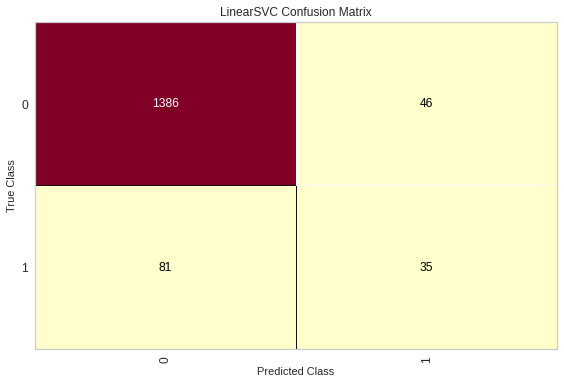

In [ ]:
confusao = ConfusionMatrix(modelo, classes=[0,1])
confusao.fit(X_treinamento,y_treinamento)
confusao.score(X_teste, y_teste)
confusao.poof()

# Testando a probabilidade de sobrevivência em um novo voo. Abaixo está uma simulação com novos dados.

In [ ]:
novo_voo = [2,2,300,35,16,4]

In [ ]:
if modelo.predict([novo_voo]) == [0]:
  print("A probabilidade de morte, com os dados passados, é baixa.")
else:
  print("A probabilidade de morte, com os dados passados, é alta.")

A probabilidade de morte, com os dados passados, é alta.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


# Relatório de conclusões.


Atividade desenvolvida como projeto de conclusão do curso: Introdução a data science Machine learning, da Escola Fuctura de Tecnologia.

Inicialmente, foram colhidos dados disponíveis em portal aberto sobre acidentes aéreos em um prazo de 10 anos. Foi realizado alguns estudos e plotados em gráficos, para melhor entendimento das relações com sua visualização.

Posteriormente, seguimos para a aplicação da Machine Learning. Foram separados dados de um grupo e alocados em um novo Data Frame. Utilizando da regressão, foi aplicado o aprendizado e foi obtido uma acuracia bastante relevante. Foi  realizado a matriz de confusão para uma visualização mais concreta do desempenho do projeto. Ao inserir novos dados, foi possível verificar o funcionamento do aprendizado e constatar que com os novos dados inseridos, a possibilidade de vítimas seria alta. 

Atividade concluída com êxito.